In [ ]:
!pip install gymnasium
# مكتبة التعامل مع الروبوتات
!pip install panda_gym
# مكتبة الصور المتحركة
!pip install numpngw

In [ ]:
import gymnasium as gym
# مكتبة التعامل مع الروبوتات
import panda_gym

In [ ]:
# دالة إنشاء صورة متحركة
from numpngw import write_apng

In [ ]:
# إنشاء بيئة العمل
env_id="PandaReach-v3"
env_id="PandaPush-v3"
#env_id="PandaStack-v3"
#env_id="PandaSlide-v3"

env = gym.make(env_id, render_mode="rgb_array")
# إعادة التهيئة
state, info = env.reset()

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 33,  33,  33],
        [ 33,  33,  33],
        [ 33,  33,  33],
        ...,
        [ 33,  33,  33],
        [ 33,  33,  33],
        [ 33,  33,  33]],

       [[ 33,  33,  33],
        [ 33,  33,  33],
        [ 33,  33,  33],
        ...,
        [ 33,  33,  33],
        [ 33,  33,  33],
        [ 33,  33,  33]],

       [[ 33,  33,  33],
        [ 33,  33,  33],
        [ 33,  33,  33],
        ...,
        [ 33,  33,  33],
        [ 33,  33,  33],
        [ 33,  33,  33]]], dtype=uint8)
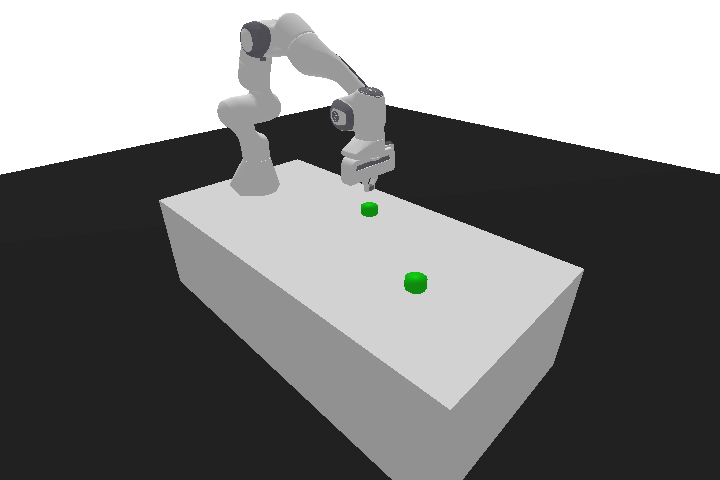

In [ ]:
# الإظهار
env.render()

In [ ]:
# طباعة مكونات الحالة
print(f"observation: {state['observation']}")
print(f"achieved_goal: {state['achieved_goal']}")
print(f"desired_goal: {state['desired_goal']}")


observation: [ 3.8439669e-02 -2.1944723e-12  1.9740014e-01  0.0000000e+00
 -0.0000000e+00  0.0000000e+00 -6.8896197e-02  1.4977585e-02
  2.9999999e-02  0.0000000e+00 -0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
achieved_goal: [-0.0688962   0.01497758  0.03      ]
desired_goal: [ 0.2976734  -0.13006602  0.03      ]


In [ ]:
# فعل عشوائي
action = env.action_space.sample()
print(action)

[ 0.96001273  0.5217659  -0.13955556]


In [ ]:
# قائمة لحفظ الصور المتتالية
images = []

# عدد الحلقات التجريبية
Episodes=10
for episode in range(Episodes):
    # مؤشر الانتهاء
    done = False
    # إجمالي مكافآت الحلقة الواحدة
    total_reward = 0
    # إعادة التهيئة
    obs, info = env.reset()
    # إضافة صورة البيئة
    images.append(env.render())
    while not done:
        # فعل عشوائي
        action = env.action_space.sample()
        # تنفيذ الفعل
        obs, reward, terminated, truncated, info = env.step(action)
        # إضافة صورة البيئة
        images.append(env.render())
        # إضافة المكافأة الحالية لإجمالي المكافآت
        total_reward = total_reward + reward
        if terminated or truncated:
          done=True
    print(f"Episode: {episode + 1} - Total Reward: {total_reward}")
# إعلاق البيئة
env.close()


Episode: 1 - Total Reward: -50.0
Episode: 2 - Total Reward: -50.0
Episode: 3 - Total Reward: -50.0
Episode: 4 - Total Reward: -50.0
Episode: 5 - Total Reward: -2.0
Episode: 6 - Total Reward: -1.0
Episode: 7 - Total Reward: 0.0
Episode: 8 - Total Reward: -50.0
Episode: 9 - Total Reward: -50.0
Episode: 10 - Total Reward: -50.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# مسار مجلد الصور
working_folder='/content/drive/MyDrive/RobotAnimation/'
# اسم ملف الصورة المتحركة
image_file_name=f"random_{env_id}_animation.png"
# مسار ملف الصورة المتحركة
image_file_path = working_folder + image_file_name

In [ ]:
# إنشاء صورة متحركة من قائمة الصور
write_apng(image_file_path, images, delay=100)

In [ ]:
# دالة عرض الصور
from IPython.display import Image
# إظهار الصورة المتحركة
Image(filename=image_file_path)

Output hidden; open in https://colab.research.google.com to view.